In [14]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [15]:
data = pd.read_csv("market_basket_dataset.csv")
print(data.head())

   BillNo  Itemname  Quantity  Price  CustomerID
0    1000    Apples         5   8.30       52299
1    1000    Butter         4   6.06       11752
2    1000      Eggs         4   2.66       16415
3    1000  Potatoes         4   8.10       22889
4    1004   Oranges         2   7.26       52255


In [16]:
print(data.isnull().sum())

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64


In [17]:
print(data.describe())

            BillNo    Quantity       Price    CustomerID
count   500.000000  500.000000  500.000000    500.000000
mean   1247.442000    2.978000    5.617660  54229.800000
std     144.483097    1.426038    2.572919  25672.122585
min    1000.000000    1.000000    1.040000  10504.000000
25%    1120.000000    2.000000    3.570000  32823.500000
50%    1246.500000    3.000000    5.430000  53506.500000
75%    1370.000000    4.000000    7.920000  76644.250000
max    1497.000000    5.000000    9.940000  99162.000000


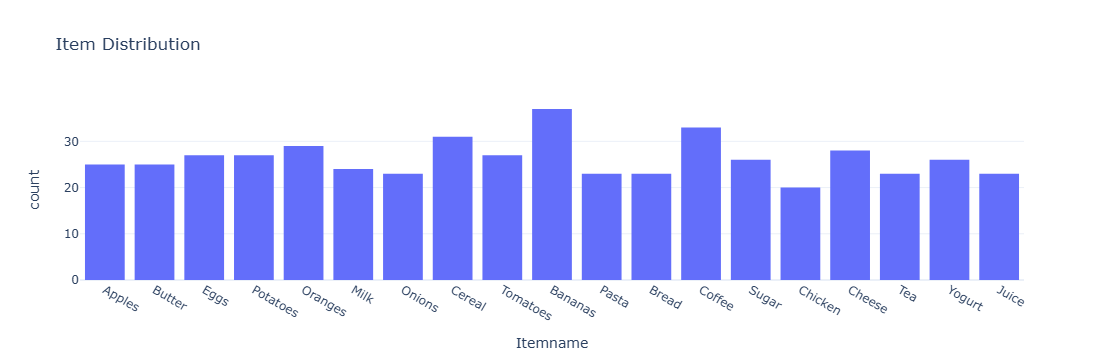

In [18]:
#Sales Distribution of Items
fig = px.histogram(data, x='Itemname', 
                   title='Item Distribution')
fig.show()

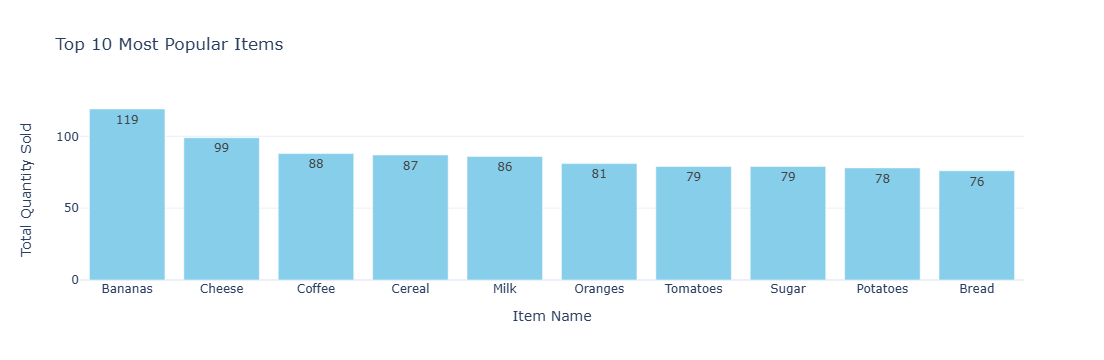

In [19]:
# Calculate item popularity - top 10
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

top_n = 10
fig = go.Figure()
fig.add_trace(go.Bar(x=item_popularity.index[:top_n], y=item_popularity.values[:top_n],
                     text=item_popularity.values[:top_n], textposition='auto',
                     marker=dict(color='skyblue')))
fig.update_layout(title=f'Top {top_n} Most Popular Items',
                  xaxis_title='Item Name', yaxis_title='Total Quantity Sold')
fig.show()

Bananas are the most popular items sold at the store

In [20]:
# Calculate average quantity and spending per customer
customer_behavior = data.groupby('CustomerID').agg({'Quantity': 'mean', 'Price': 'sum'}).reset_index()

# Create a DataFrame to display the values
table_data = pd.DataFrame({
    'CustomerID': customer_behavior['CustomerID'],
    'Average Quantity': customer_behavior['Quantity'],
    'Total Spending': customer_behavior['Price']
})

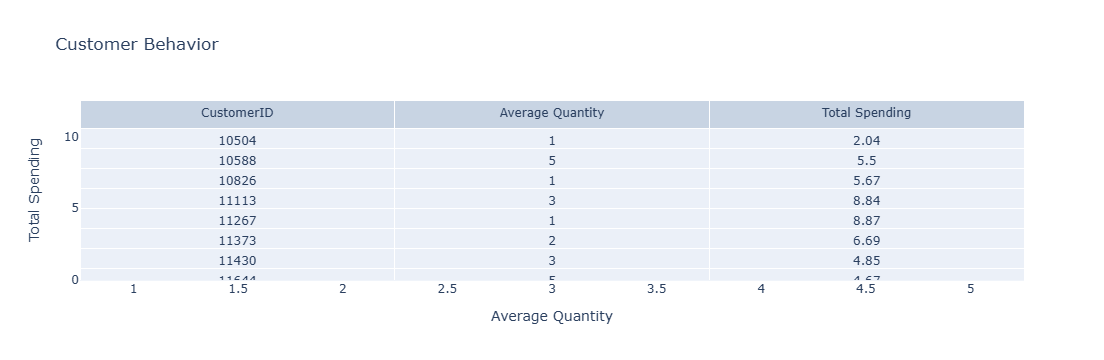

In [21]:
# Create a subplot with a scatter plot and a table
fig = go.Figure()

# Add a scatter plot
fig.add_trace(go.Scatter(x=customer_behavior['Quantity'], y=customer_behavior['Price'],
                         mode='markers', text=customer_behavior['CustomerID'],
                         marker=dict(size=10, color='coral')))

# Add a table
fig.add_trace(go.Table(
    header=dict(values=['CustomerID', 'Average Quantity', 'Total Spending']),
    cells=dict(values=[table_data['CustomerID'], table_data['Average Quantity'], table_data['Total Spending']]),
))

# Update layout
fig.update_layout(title='Customer Behavior',
                  xaxis_title='Average Quantity', yaxis_title='Total Spending')

# Show the plot
fig.show()

Using Apriori Algorithm:
The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data. It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing. 

In [25]:
!pip install mlxtend

In [26]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [28]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [29]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group items by BillNo and create a list of items for each bill
basket = data.groupby('BillNo')['Itemname'].apply(list).reset_index()

# Encode items as binary variables using one-hot encoding
basket_encoded = basket['Itemname'].str.join('|').str.get_dummies('|')

# Find frequent itemsets using Apriori algorithm with lower support
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Display key columns of association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


      antecedents                                        consequents  \
0         (Bread)                                           (Apples)   
1        (Apples)                                            (Bread)   
2        (Butter)                                           (Apples)   
3        (Apples)                                           (Butter)   
4        (Cereal)                                           (Apples)   
...           ...                                                ...   
18487    (Cereal)   (Oranges, Juice, Bread, Chicken, Butter, Coffee)   
18488     (Bread)  (Oranges, Juice, Cereal, Chicken, Butter, Coffee)   
18489   (Chicken)    (Oranges, Juice, Cereal, Bread, Butter, Coffee)   
18490    (Butter)   (Oranges, Juice, Cereal, Bread, Chicken, Coffee)   
18491    (Coffee)   (Oranges, Juice, Cereal, Bread, Chicken, Butter)   

        support  confidence      lift  
0      0.045752    0.304348  1.862609  
1      0.045752    0.280000  1.862609  
2      0.026144

Antecedents: These are the items that are considered as the starting point or “if” part of the association rule. For example, Bread, Butter, Cereal, Cheese, and Chicken are the antecedents in this analysis.
Consequents: These are the items that tend to be purchased along with the antecedents or the “then” part of the association rule.
Support: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. For example, the first rule indicates that Bread and Apples are bought together in approximately 4.58% of all transactions.
Confidence: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 30.43% chance of buying Apples when Bread is already in the basket.
Lift: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 1.86, suggesting a positive association between Bread and Apples.